# Titanic: Machine Learning from disaster

Importing packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from .csv files

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Attributes

In [5]:
attributes = list(train_data)
attributes

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
train_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Looking for missing values

In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data types

In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Counting values

In [9]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Cleaning train data

Managing attribute 'Embarked'

In [12]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train_data.Embarked.isna().sum()

2

In [14]:
train_data['Embarked'] = train_data['Embarked'].fillna('S') 

In [15]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Managing attribute 'Sex'

In [16]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Alternative: computing dummy variables / one-hot encoding

In [17]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Deleting attributes 'PassengerId', 'Name', 'Ticket' and 'Cabin' (not important to determine whether a passenger survived or not)

In [18]:
train_data_clean = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [19]:
train_data_clean.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Managing attribute 'Embarked'

In [20]:
train_data_clean['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_data_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,NaN,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


Checking data types

In [21]:
train_data_clean.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [22]:
train_data_clean.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Managing attribute 'Age': two different methods

In [23]:
# age_method = 1
age_method = 2

### Method 1

In [24]:
def method_1(train_data_clean):
  # Method 1: https://www.kaggle.com/abhishekmamidi/titanic-data-preprocessing-and-visualization

  NaN_indexes = train_data_clean['Age'][train_data_clean['Age'].isnull()].index
  NaN_indexes

  for i in NaN_indexes:
      pred_age = train_data_clean['Age'][((train_data_clean.SibSp == train_data_clean.iloc[i]["SibSp"]) & (train_data_clean.Parch == train_data_clean.iloc[i]["Parch"]) & (train_data_clean.Pclass == train_data_clean.iloc[i]["Pclass"]))].median()
      if not np.isnan(pred_age):
          train_data_clean['Age'].iloc[i] = pred_age
      else:
          train_data_clean['Age'].iloc[i] = train_data_clean['Age'].median()

  return train_data_clean

### Method 2

In [25]:
def method_2(train_data_clean):
  fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
  axis1.set_title('Original Age values - Titanic')
  axis2.set_title('New Age values - Titanic')

  #Random values
  # get average, std, and number of NaN values in train_data_clean
  average_age_titanic   = train_data["Age"].mean()
  std_age_titanic       = train_data["Age"].std()
  count_nan_age_titanic = train_data["Age"].isnull().sum()

  # generate random numbers between (mean - std) & (mean + std)
  rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

  #transform null into int
  train_data_clean['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

  # fill NaN values in Age column with random values generated
  train_data_clean["Age"][np.isnan(train_data_clean["Age"])] = rand_1

  # convert from float to int
  train_data_clean['Age'] = train_data_clean['Age'].astype(int)
          
  # plot new Age 
  train_data_clean['Age'].hist(bins=70, ax=axis2)

  return train_data_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


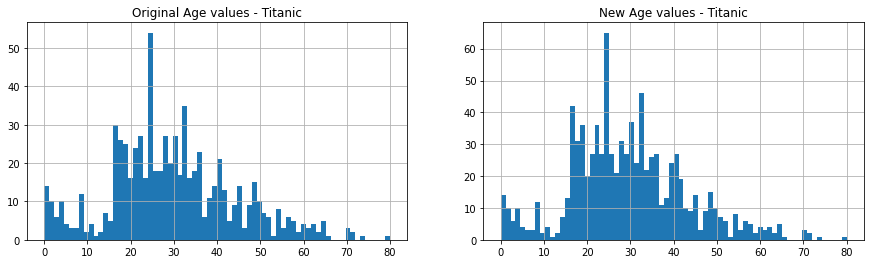

In [26]:
if age_method == 1:
  train_data_clean = method_1(train_data_clean)
elif age_method == 2:
  train_data_clean = method_2(train_data_clean)

Dataset is now clean

In [27]:
train_data_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
train_data_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
5,0,3,0,15,0,0,8.4583,2
6,0,1,0,54,0,0,51.8625,0
7,0,3,0,2,3,1,21.0750,0
8,1,3,1,27,0,2,11.1333,0
9,1,2,1,14,1,0,30.0708,1


In [29]:
train_data_clean.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
881,0,3,0,33,0,0,7.8958,0
882,0,3,1,22,0,0,10.5167,0
883,0,2,0,28,0,0,10.5000,0
884,0,3,0,25,0,0,7.0500,0
885,0,3,1,39,0,5,29.1250,2
886,0,2,0,27,0,0,13.0000,0
887,1,1,1,19,0,0,30.0000,0
888,0,3,1,20,1,2,23.4500,0
889,1,1,0,26,0,0,30.0000,1
890,0,3,0,32,0,0,7.7500,2


# Correlation matrix

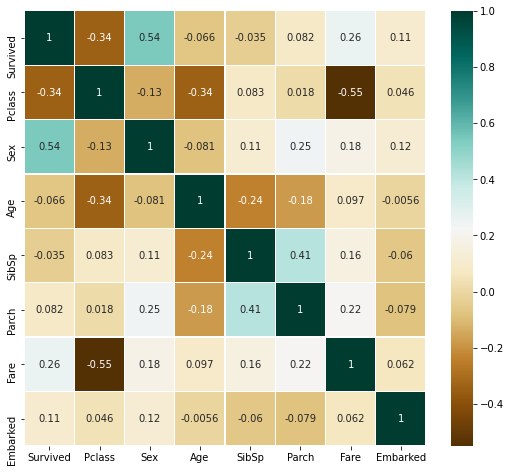

In [30]:
corr_matrix = train_data_clean.corr()

plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

## Decision Trees

In [31]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

In [32]:
for attr in list(train_data_clean):
  print(train_data_clean[attr].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
0    577
1    314
Name: Sex, dtype: int64
24    38
30    37
19    36
22    36
28    31
      ..
74     1
66     1
12     1
53     1
80     1
Name: Age, Length: 71, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
0    646
1    168
2     77
Name: Embarked, dtype: int64


## Cleaning test data

In [34]:
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [37]:
test_data_clean = test_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_data_clean['Embarked'] = test_data_clean['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_data_clean['Sex'] = test_data_clean['Sex'].map({'male':0, 'female':1})
test_data_clean.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
5,3,0,14.0,0,0,9.2250,0
6,3,1,30.0,0,0,7.6292,2
7,2,0,26.0,1,1,29.0000,0
8,3,1,18.0,0,0,7.2292,1
9,3,0,21.0,2,0,24.1500,0


In [58]:
test_data_clean.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [48]:
test_data_clean["Fare"] = test_data_clean["Fare"].fillna(test_data_clean["Fare"].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


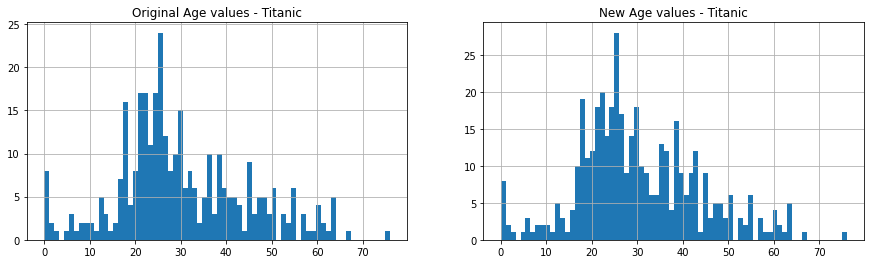

In [59]:
# https://www.kaggle.com/omarelgabry/a-journey-through-titanic

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# Random values
# get average, std, and number of NaN values in train_data_clean
average_age_titanic   = test_data["Age"].mean()
std_age_titanic       = test_data["Age"].std()
count_nan_age_titanic = test_data["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

#transform null into int
test_data_clean['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
test_data_clean["Age"][np.isnan(test_data_clean["Age"])] = rand_1

# convert from float to int
test_data_clean['Age'] = test_data_clean['Age'].astype(int)
        
# plot new Age Values
test_data_clean['Age'].hist(bins=70, ax=axis2)

In [60]:
test_data_clean.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Let's apply a Decision Tree

In [61]:
# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)

x_train = train_data_clean.drop(['Survived'], axis=1).values
y_train = train_data['Survived']

x_test = test_data_clean.values

# Training
decision_tree = decision_tree.fit(x_train, y_train)

# Inference
y_pred = decision_tree.predict(x_test)

In [65]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

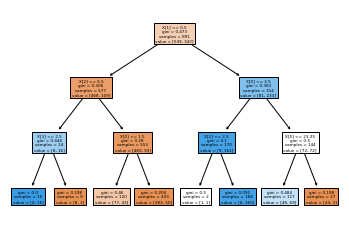

In [66]:
from sklearn.tree import plot_tree
plt.figure()
# decision_tree --> trained model result 
plot_tree(decision_tree, filled=True)
plt.show()

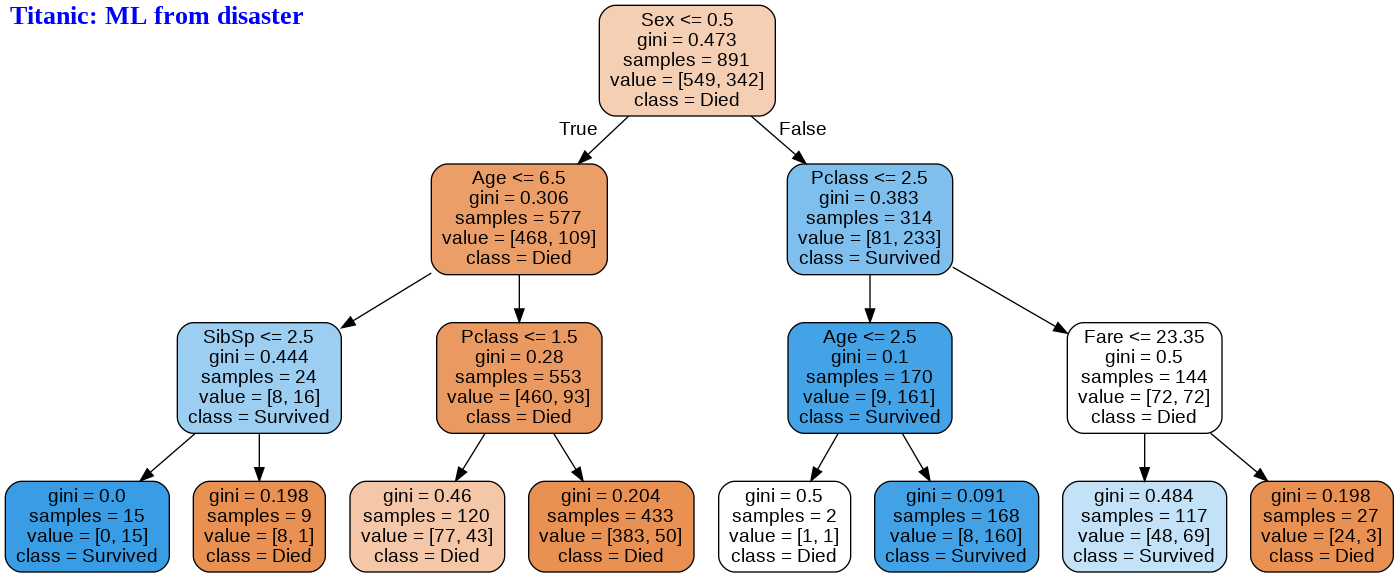

In [68]:
#Tutorial: https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

import xgboost as xgb
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train_data_clean.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
draw.text((10, 0), # Drawing offset (position)
          'Titanic: ML from disaster', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")

In [69]:
from sklearn.model_selection import cross_val_score

decision_tree_cv = tree.DecisionTreeClassifier(max_depth=3)
score = cross_val_score(decision_tree_cv, x_train, y_train, cv=10)

mean_acc = sum(score) / 10

In [70]:
score

array([0.81111111, 0.84269663, 0.7752809 , 0.84269663, 0.84269663,
       0.78651685, 0.78651685, 0.78651685, 0.86516854, 0.80898876])

In [71]:
mean_acc

0.8148189762796502